<a href="https://colab.research.google.com/github/tiesen243/digit-recognition/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [260]:
import os
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Model

### Utils

In [261]:
def softmax(z: np.ndarray) -> np.ndarray:
  return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

In [262]:
def cross_entropy(y: np.ndarray, probs: np.ndarray):
  return -1 * np.mean(y * np.log(probs))

In [263]:
def maximun_likelihood(y: np.ndarray, probs: np.ndarray):
  return -1 * np.mean(np.log(probs[np.arange(len(y)), y]))

In [264]:
def one_hot(y: np.ndarray) -> np.ndarray:
  return np.eye(len(np.unique(y)))[y]

### LogisticRegression class

In [265]:
class LogisticRegression:
    def __init__(self, lr: float = 0.001, n_iter: int = 1000):
        """
        Initialize the LogisticRegression model.

        Parameters
        ----------
        lr : float
            The learning rate.
        n_iter : int
            The number of iterations.
        loss : str
            The loss function to use.
        """
        self.lr = lr
        self.n_iter = n_iter

        self.weights: np.ndarray
        self.bias: np.ndarray

        self.loss: list = []
        self.accuracy: list = []

    def fit(self, X: np.ndarray, y: np.ndarray, loss: str = 'mle', seed: int = 69, verbose: bool = False) -> None:
      """
      Fit the model to the data.

      Parameters
      ----------
      X : np.ndarray
          The input data.
      y : np.ndarray
          The target data.
      seed : int, optional
          The random seed to use, by default 69.
      verbose : bool, optional
          Whether to print the loss and accuracy of the model during training, by default False.
      """
      np.random.seed(seed)
      n_samples, n_features = X.shape
      n_classes = len(np.unique(y))

      self.weights = np.zeros((n_features, n_classes))
      self.bias = np.zeros(n_classes)
      self.get_loss(loss)

      X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

      for i in range(self.n_iter):
        y_pred = self.predict_proba(X_train)

        self.loss.append(self.loss_func(one_hot(y_train), y_pred))
        self.accuracy.append(self.score(X_val, y_val))

        error = y_pred - one_hot(y_train)
        dw = (1 / n_samples) * np.dot(X_train.T, error)
        db = (1 / n_samples) * np.sum(error)

        self.weights -= self.lr * dw
        self.bias -= self.lr * db

        if verbose and i % 100 == 0:
          print(f'Iteration {i}: Loss = {self.loss[-1]:.4f}, Accuracy = {self.accuracy[-1]:.4f}')

    def get_loss(self, loss: str = "mle") -> None:
      """
      Get the loss function.

      Parameters
      ----------
      loss : str
          The loss function to use.
          Availible options: 'mle', 'cross_entropy'.
      """
      if loss == "mle":
        self.loss_func = maximun_likelihood
      elif loss == "cross_entropy":
        self.loss_func = cross_entropy
      else:
        raise ValueError("Invalid loss function")

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
      """
      Predict the probability of each class for each sample.

      Parameters
      ----------
      X : np.ndarray
          The input data.

      Returns
      -------
      np.ndarray
          The predicted probabilities.
      """
      y_pred = np.dot(X, self.weights) + self.bias
      return softmax(y_pred)

    def predict(self, X: np.ndarray) -> np.ndarray:
      """
      Predict the class of each sample.

      Parameters
      ----------
      X : np.ndarray
          The input data.

      Returns
      -------
      np.ndarray
          The predicted classes.
      """
      return np.argmax(self.predict_proba(X), axis=1)

    def score(self, X: np.ndarray, y: np.ndarray):
      """
      Compute the accuracy of the model.

      Parameters
      ----------
      X : np.ndarray
          The input data.
      y : np.ndarray
          The target data.

      Returns
      -------
      float
          The accuracy of the model.
      """
      return np.mean(self.predict(X) == y)

    def save(self, path: str = 'model.npz') -> None:
      """
      Save the model to a file.

      Parameters
      ----------
      path : str, optional
          The path to save the model to, by default 'model.npz'.
      """

      if not os.path.exists(path):
        os.makedirs(os.path.dirname(path), exist_ok=True)

      np.savez(path, weights=self.weights, bias=self.bias)

    def load(self, path: str = 'model.npz') -> None:
      """
      Load the model from a file.

      Parameters
      ----------
      path : str, optional
          The path to load the model from, by default 'model.npz'.
      """
      data = np.load(path)
      self.weights = data['weights']
      self.bias = data['bias']

## Train model

In [266]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"Numbers of classes: {len(np.unique(y))}")

(120, 4) (30, 4) (120,) (30,)
Numbers of classes: 3


In [267]:
model = LogisticRegression()
model.fit(X_train, y_train, loss='cross_entropy', seed=71, verbose=True)

Iteration 0: Loss = 0.3662, Accuracy = 0.2083
Iteration 100: Loss = 0.3471, Accuracy = 0.7500
Iteration 200: Loss = 0.3313, Accuracy = 0.7917
Iteration 300: Loss = 0.3173, Accuracy = 0.7500
Iteration 400: Loss = 0.3047, Accuracy = 0.7500
Iteration 500: Loss = 0.2934, Accuracy = 0.7500
Iteration 600: Loss = 0.2832, Accuracy = 0.7500
Iteration 700: Loss = 0.2740, Accuracy = 0.7500
Iteration 800: Loss = 0.2657, Accuracy = 0.7500
Iteration 900: Loss = 0.2582, Accuracy = 0.7500


In [268]:
model.score(X_test, y_test)

0.8666666666666667

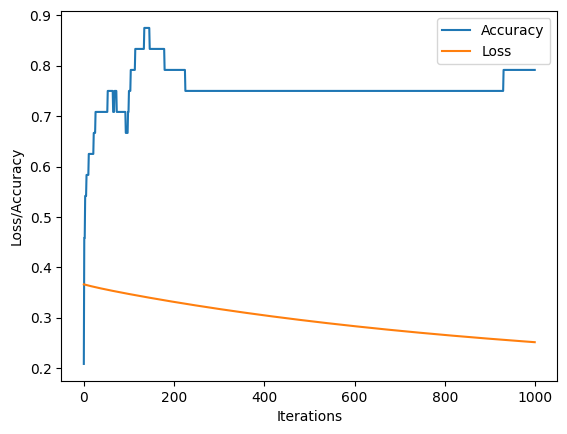

In [269]:
plt.plot(model.accuracy, label='Accuracy')
plt.plot(model.loss, label='Loss')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.show()